<a href="https://colab.research.google.com/github/JohanM3/Python-Prep/blob/main/Especies_Amenazadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/Listado_oficial_especies_silvestres_amenazadas_diversidad_biologica_colombiana_continental_marino_costera.csv'
df = pd.read_csv(file_path)

# Visualizar las primeras filas del dataframe para inspeccionar la estructura y los datos
df.head()

,IDENTIFICACION,IDENTIFICACION TAXONOMICA,NOMBRE CIENTIFICO,CLASIFICACION SUPERIOR,REINO,FILO,CLASE,ORDEN,FAMILIA,GENERO,EPITETO ESPECIFICO,EPITETO INFRAESPECIFICO,RANGO DE TAXON,NOMBRE CIENTIFICO 1,NOMBRE VERNACULO,CODIGO NOMENCLATURA,ESTADO TAXONOMICO,TAXON OBSERVACIONES,LENGUAJE,ESTADO DE AMENAZA
0,gbif.org/species/3548724,gbif.org/species/3548724,Arthonia obscurella,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Arthoniaceae,Arthonia,obscurella,NaN,Especie,Müll.Arg.,NaN,ICN,Aceptado,Nombre original validado: Arthonia obscurella ...,es,CR
1,gbif.org/species/3548779,gbif.org/species/3548779,Arthonia septemlocularis,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Arthoniaceae,Arthonia,septemlocularis,NaN,Especie,Müll.Arg.,NaN,ICN,Aceptado,Nombre original validado: Arthonia septemlocul...,es,CR
2,gbif.org/species/10800176,gbif.org/species/10800176,Ancistrosporella leucophila,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Roccellaceae,Ancistrosporella,leucophila,NaN,Especie,(Nyl.) Ertz,NaN,ICN,Aceptado,Nombre original validado: Ancistrosporella leu...,es,CR
3,gbif.org/species/10874088,gbif.org/species/10874088,Byssoloma permutans,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Lecanoromycetes,Lecanorales,Byssolomataceae,Byssoloma,permutans,NaN,Especie,(Nyl.) Lücking,NaN,ICN,Aceptado,Nombre original validado: Byssoloma permutans ...,es,CR
4,gbif.org/species/5516240,gbif.org/species/5516240,Lecanactis proximans,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Roccellaceae,Lecanactis,proximans,NaN,Especie,(Nyl.) Zahlbr.,NaN,ICN,Aceptado,Nombre original validado: Lecanactis proximans...,es,CR


In [2]:
# Verificar y eliminar duplicados
df_cleaned = df.drop_duplicates()

# Resumen de valores faltantes
valores_faltantes = df_cleaned.isnull().sum()

# Mostrar los resultados de valores faltantes
valores_faltantes

IDENTIFICACION                  0
IDENTIFICACION TAXONOMICA       0
NOMBRE CIENTIFICO               0
CLASIFICACION SUPERIOR          0
REINO                           0
FILO                            0
CLASE                           0
ORDEN                           0
FAMILIA                         0
GENERO                          0
EPITETO ESPECIFICO              0
EPITETO INFRAESPECIFICO      2069
RANGO DE TAXON                  0
NOMBRE CIENTIFICO 1            15
NOMBRE VERNACULO             1236
CODIGO NOMENCLATURA             0
ESTADO TAXONOMICO               0
TAXON OBSERVACIONES             0
LENGUAJE                        0
ESTADO DE AMENAZA               0
dtype: int64

In [3]:
# Distribución de especies por categoría de amenaza
distribucion_amenaza = df_cleaned['ESTADO DE AMENAZA'].value_counts()

# Distribución de especies por reino
distribucion_reino = df_cleaned['REINO'].value_counts()

# Mostrar los resultados
distribucion_amenaza, distribucion_reino

(ESTADO DE AMENAZA
 VU    837
 EN    801
 CR    465
 Name: count, dtype: int64,
 REINO
 Plantae     1263
 Animalia     759
 Fungi         81
 Name: count, dtype: int64)

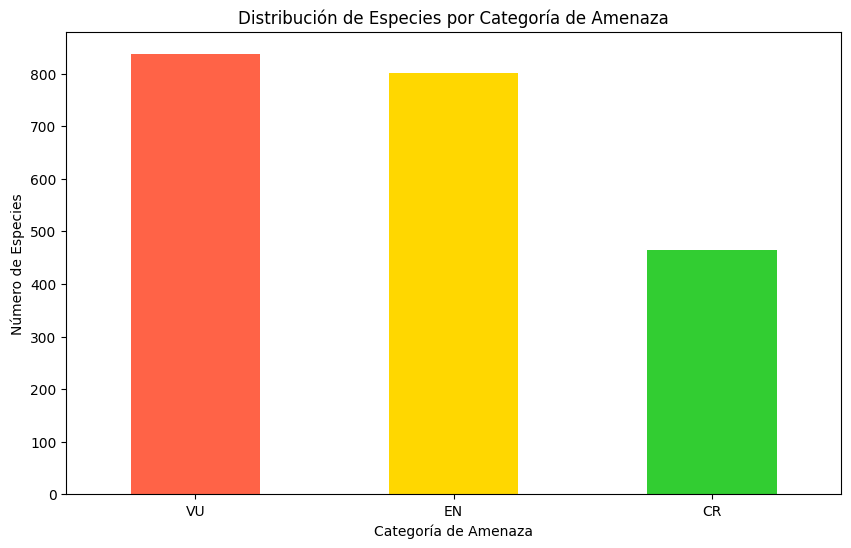

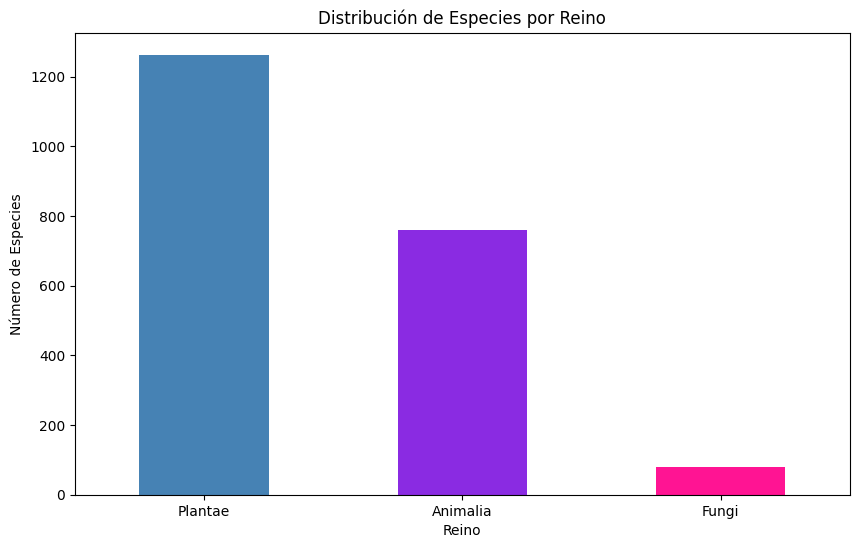

In [4]:
import matplotlib.pyplot as plt

# Gráfico de barras para la distribución por categoría de amenaza
plt.figure(figsize=(10, 6))
distribucion_amenaza.plot(kind='bar', color=['#FF6347', '#FFD700', '#32CD32'])
plt.title('Distribución de Especies por Categoría de Amenaza')
plt.xlabel('Categoría de Amenaza')
plt.ylabel('Número de Especies')
plt.xticks(rotation=0)
plt.show()

# Gráfico de barras para la distribución por reino
plt.figure(figsize=(10, 6))
distribucion_reino.plot(kind='bar', color=['#4682B4', '#8A2BE2', '#FF1493'])
plt.title('Distribución de Especies por Reino')
plt.xlabel('Reino')
plt.ylabel('Número de Especies')
plt.xticks(rotation=0)
plt.show()

In [5]:
# Filtrar especies críticamente amenazadas
especies_cr = df_cleaned[df_cleaned['ESTADO DE AMENAZA'] == 'CR']
distribucion_cr_reino = especies_cr['REINO'].value_counts()

# Filtrar especies en peligro
especies_en = df_cleaned[df_cleaned['ESTADO DE AMENAZA'] == 'EN']
distribucion_en_reino = especies_en['REINO'].value_counts()

# Filtrar especies vulnerables
especies_vu = df_cleaned[df_cleaned['ESTADO DE AMENAZA'] == 'VU']
distribucion_vu_reino = especies_vu['REINO'].value_counts()

# Mostrar los resultados
distribucion_cr_reino, distribucion_en_reino, distribucion_vu_reino

(REINO
 Plantae     287
 Animalia    125
 Fungi        53
 Name: count, dtype: int64,
 REINO
 Plantae     507
 Animalia    276
 Fungi        18
 Name: count, dtype: int64,
 REINO
 Plantae     469
 Animalia    358
 Fungi        10
 Name: count, dtype: int64)